In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
!pip3 install xlrd --user

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df_ca = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20), skipfooter=2)
df_ca.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print(df_ca.columns.values)

['Type' 'Coverage' 'OdName' 'AREA' 'AreaName' 'REG' 'RegName' 'DEV'
 'DevName' 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013]


In [6]:
df_ca.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace= True)
df_ca.columns

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [7]:
df_ca['Total'] = df_ca.iloc[:, 9:43].sum(axis=1)

In [8]:
df_ca.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,6
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df_ca.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


#### Filtering columns

In [10]:
df_ca[['Country', 1980,2013]]

,Country,1980,2013
0,Afghanistan,16,2004
1,Albania,1,603
2,Algeria,80,4331
3,American Samoa,0,0
4,Andorra,0,1
5,Angola,1,45
6,Antigua and Barbuda,0,25
7,Argentina,368,282
8,Armenia,0,207
9,Australia,702,1121


 ### Setting 'Country' as index

In [11]:
df_ca.set_index('Country', inplace=True)

In [12]:
df_ca.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


#### Get full data of a country and year

In [13]:
print(df_ca.loc['India'])
print("India 2012: ",df_ca.loc['India', 2012])


Type                 Immigrants
Coverage             Foreigners
AREA                        935
Continent                  Asia
REG                        5501
Region            Southern Asia
DEV                         902
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003    

### Convert Column names to string to avoid confusion with index or column name

In [14]:
df_ca.columns = list(map(str, df_ca.columns))

Creating a list to save all years for future use

In [15]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


### Filtering based on Criteria

In [16]:
# Creating a condition
condition = df_ca['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [17]:
# Will show the countries in 'Asia'
df_ca[condition]

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,2,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,...,370,529,460,354,203,200,196,233,288,6538
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [18]:
# To pass multiple criteria
df_ca[(df_ca['Continent'] == 'Asia') & (df_ca['Region']=='Southern Asia')]

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1,1,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,185,371,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


## Line plots

In [19]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['grayscale', 'seaborn-dark-palette', 'ggplot', 'seaborn-whitegrid', 'seaborn-bright', 'dark_background', 'seaborn', 'seaborn-deep', 'Solarize_Light2', 'seaborn-ticks', 'seaborn-poster', 'bmh', 'seaborn-muted', 'seaborn-notebook', 'seaborn-pastel', 'seaborn-dark', 'fivethirtyeight', 'fast', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-talk', '_classic_test', 'classic', 'seaborn-white']


In [20]:
india = df_ca.loc['India', years]
india.index = india.index.map(int)
india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

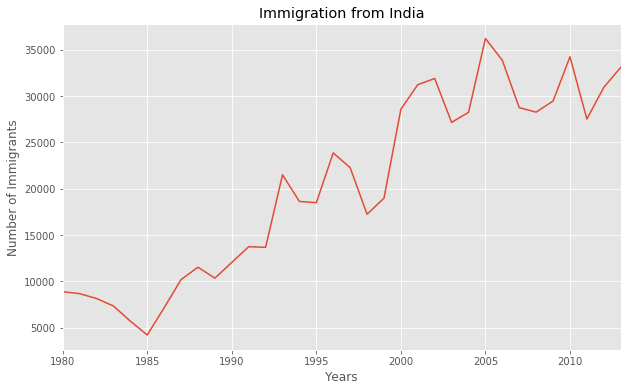

In [21]:
india.plot(kind='line')
plt.title('Immigration from India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show() 

Taking multiple countries 

In [22]:
df_multiple = df_ca.loc[['India', 'China', 'France', 'Australia'], years].transpose()
df_multiple.head()

Country,India,China,France,Australia
1980,8880,5123,1729,702
1981,8670,6682,2027,639
1982,8147,3308,2219,484
1983,7338,1863,1490,317
1984,5704,1527,1169,317


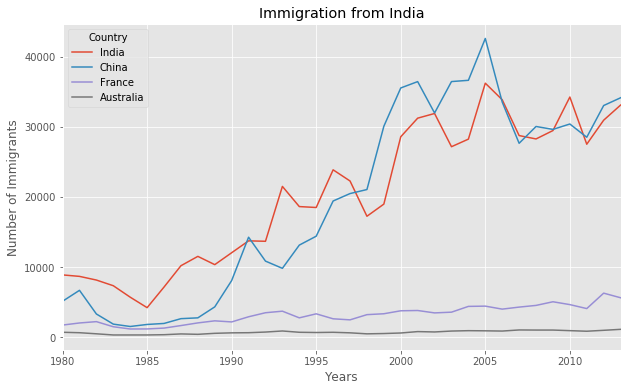

In [23]:
df_multiple.plot(kind='line')
plt.title('Immigration from India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show() 

Compare the trend of top 5 countries

In [24]:
df_ca.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_ca.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


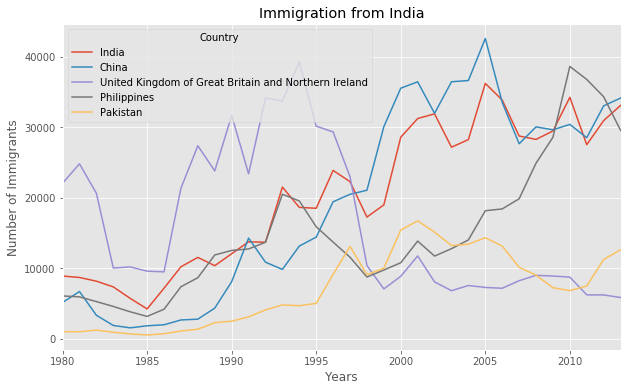

In [25]:
df_top5.plot(kind='line')
plt.title('Immigration from India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show() 

## Area Plots

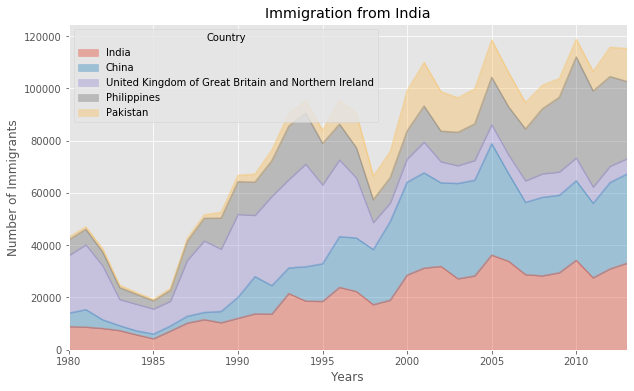

In [26]:
df_top5.plot(kind='area',alpha=0.4)
plt.title('Immigration from India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show() 

## Histogram
A histogram is a way of representing the frequency distribution of a variable.

In [27]:
df_ca['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [28]:
frequency, bin_edges = np.histogram(df_ca['2013'])

print(frequency)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default the histogram breaks the data to 10 bins. 

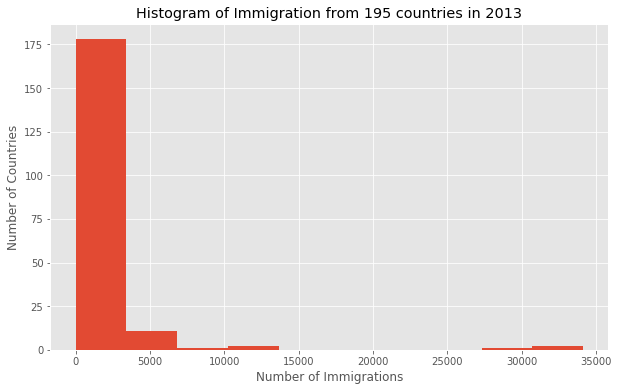

In [29]:
df_ca['2013'].plot(kind='hist')
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrations')
plt.show()

Here the x axis do not match the bin size. It can be fixed by passing a ```xticks``` keyword containing the list of bin sizes

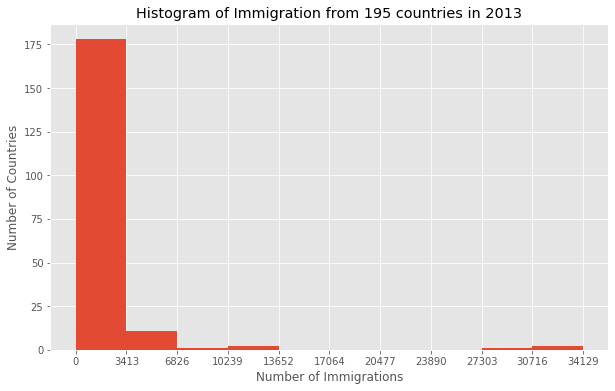

In [30]:
frequency, bin_edgs = np.histogram(df_ca['2013'])
df_ca['2013'].plot(kind='hist', xticks=bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrations')
plt.show()

Immigration distribution for Multiple countries at a time

In [31]:
# say Norway, France, Germany
df_ca.loc[['Poland', 'France', 'Germany'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,...,1533,1405,1263,1235,1267,1013,795,720,779,852
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,...,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623
Germany,1626,1977,3062,2376,1610,1441,1233,1704,1482,1706,...,2020,2226,2767,2449,3833,3887,2956,2053,1702,1217


In [48]:
df_multi = df_ca.loc[['India', 'China', 'Philippines'], years].transpose()
df_multi.head()

Country,India,China,Philippines
1980,8880,5123,6051
1981,8670,6682,5921
1982,8147,3308,5249
1983,7338,1863,4562
1984,5704,1527,3801


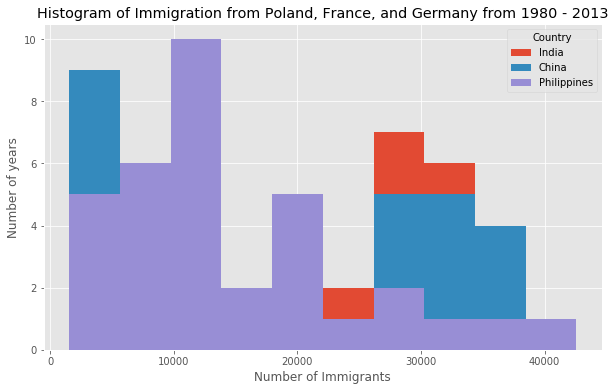

In [49]:
df_multi.plot(kind='hist')
plt.title('Histogram of Immigration from Poland, France, and Germany from 1980 - 2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')
plt.show()

To make it more understandable: 
- increase the bin size to 15
- set transparency 
- color code

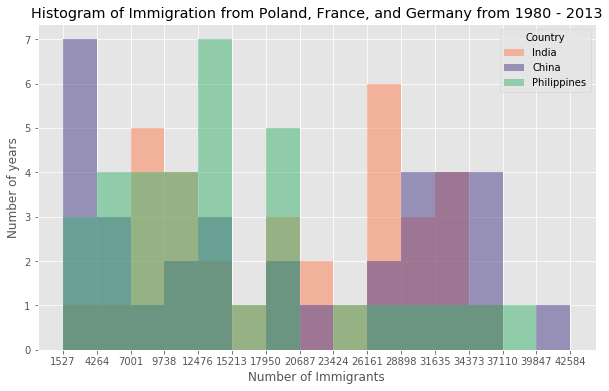

In [50]:
freq, bin_edges = np.histogram(df_multi, 15)

df_multi.plot(kind='hist', bins=15, alpha=0.5, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration from Poland, France, and Germany from 1980 - 2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')
plt.show()

## Bar Charts
Here the length of the bar represent the magnitude of the variable

In [51]:
df_iceland = df_ca.loc['Iceland', years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

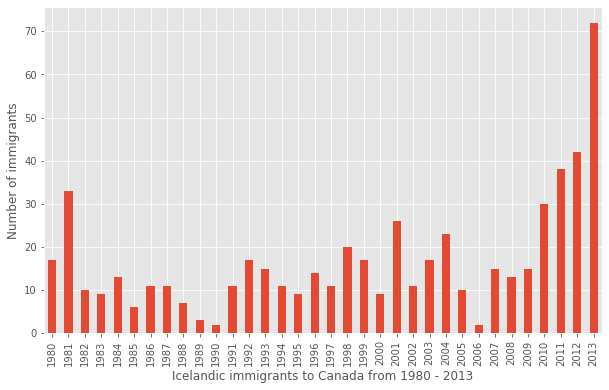

In [54]:
df_iceland.plot(kind='bar')
plt.ylabel('Number of immigrants')
plt.xlabel('Icelandic immigrants to Canada from 1980 - 2013')
plt.show()

Here we can see that the number of immigrants increase rapidly after 2008. Let's use the ```annotate``` method to point that out

- ```s```: str, text of annotation
- ```xy```: (x,y) coordinate to annotate
- ```xytext```:(x,y) coordinate to position text
- ```xycoords```: xy is given in 'data' uses the coordinate system of the object being annotated
- ```arrowprops```: dictionary: properties for drawing an arrow
    - ```arrowstyle```: Style of the arrow
    - ```connectionstyle```: connection type. arc3 is a straight line
    - ```color```: color of arrow
    - ```lw```: line width

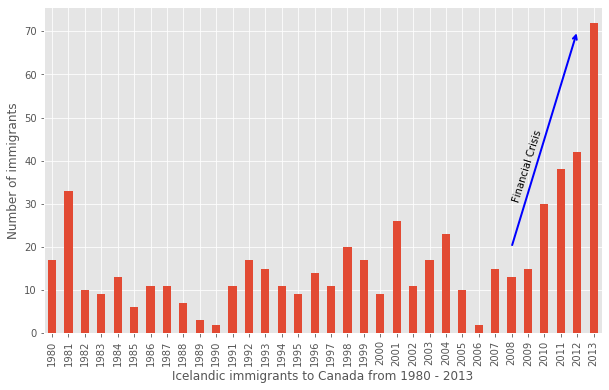

In [67]:
df_iceland.plot(kind='bar')
plt.ylabel('Number of immigrants')
plt.xlabel('Icelandic immigrants to Canada from 1980 - 2013')

plt.annotate('', xy=(32,70),xytext=(28,20), xycoords='data',arrowprops=dict(arrowstyle='->', 
                                                                            connectionstyle='arc3',
                                                                            color='blue',
                                                                            lw=2))
# Add text
# va : vertical alignment
# ha : horizontal alignment
plt.annotate('Financial Crisis', xy=(28,30), rotation=72.5, va='bottom', ha='left') 

plt.show()